In [226]:
!pip install pandas -q
!pip install matplotlib -q
!pip install scipy -q
!pip install scikit-learn -q


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [404]:
df = pd.read_csv(f'/Users/inteoty/Documents/MTH234/dataset.csv', sep=";")
df = df.iloc[:1000]
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
995,10,28.01.2015,0.130,5.10,5.0,8.41,1.00,0.040,43.10,0.280,42.10
996,10,27.02.2015,0.190,3.10,6.0,8.41,1.10,0.070,21.96,0.260,23.69
997,10,24.03.2015,0.190,4.40,9.0,11.50,4.10,0.100,23.50,0.020,43.90
998,10,15.04.2015,0.150,5.30,6.0,10.30,2.50,0.110,29.63,0.050,30.71


In [84]:
np.cov(list(df['O2']), list(df['NO3']))

array([[ 15.82138102,   5.1527904 ],
       [  5.1527904 , 108.34527668]])

In [407]:
x = list(df['O2'])
y = list(df['BSK5'])

In [409]:
droplist = list()
for i in range(len(y)):
    if y[i] > 9:
        print(i)
        droplist.append(i)
    if x[i] > 18:
        print(i)
        droplist.append(i)

x = np.delete(x, droplist)
y = np.delete(y, droplist)

9
33
34
64
76
84
88
89
134
172
183
184
198
199
440
552
637
667
708
721
726
790
791
795
799
801
802
804
896
961
962
979
979
986
991


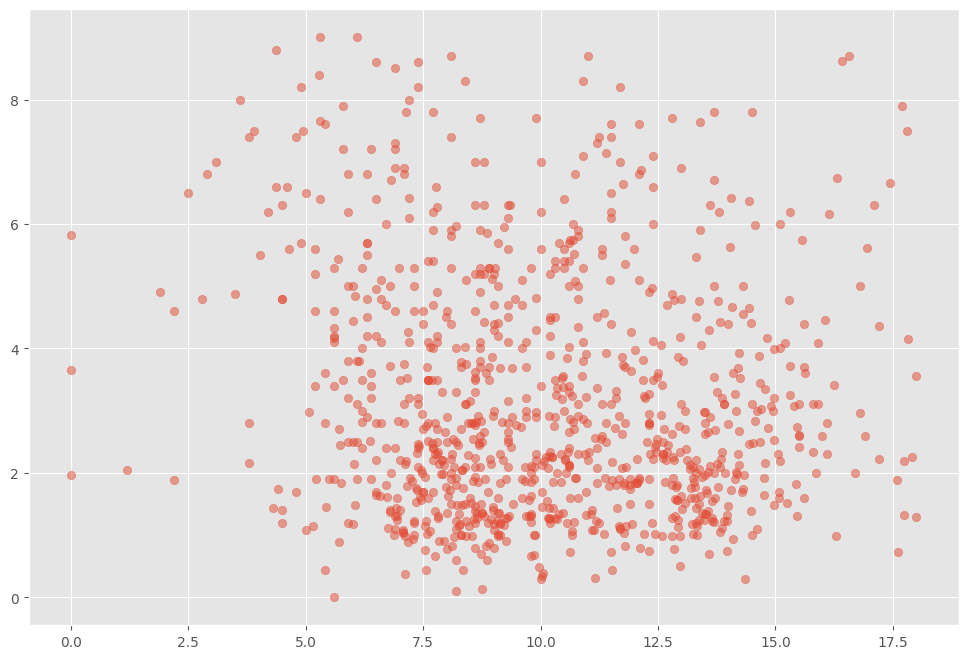

In [410]:
X = np.vstack((x, y)).T
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.show()

In [411]:
cov = np.cov(X[:, 0], X[:, 1])
print(cov)
sigXX = cov[0, 0]
sigXY = cov[0, 1]
sigYY = cov[1, 1]
print(sigXX, sigXY, sigYY)

[[ 9.95755556 -0.67433798]
 [-0.67433798  3.69612361]]
9.957555563565364 -0.6743379815273711 3.6961236069899908


In [434]:
X = X - np.mean(X, axis=0)

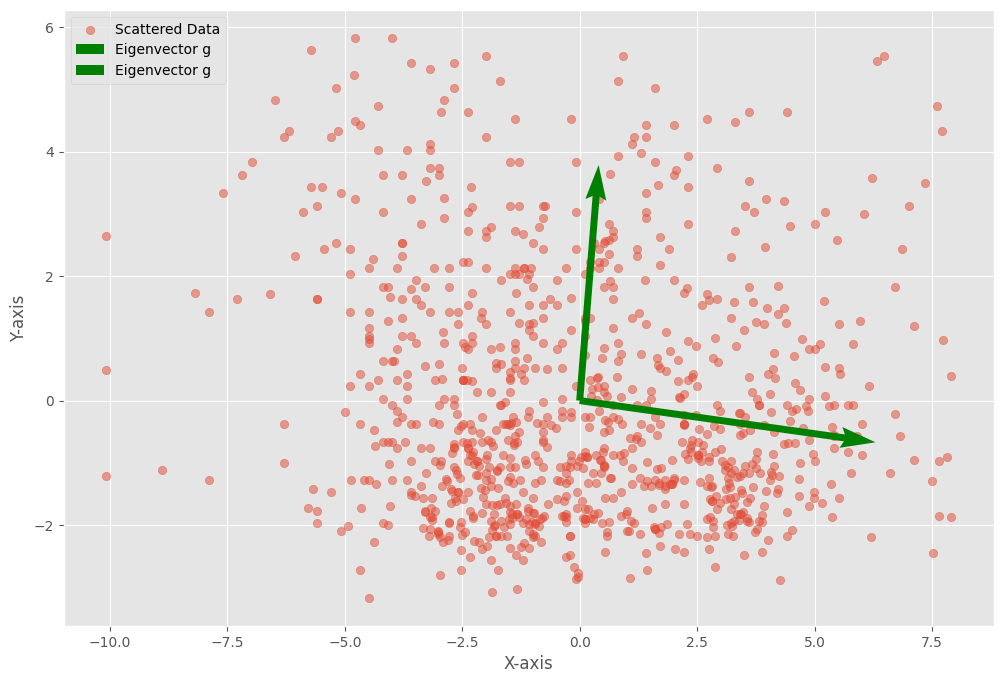

In [452]:
cov_matrix = np.cov(X, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Scattered Data')

origin = np.mean(X, axis=0)  
colors = ['g', 'g']  

for color, (value, vector) in zip(colors, zip(eigenvalues, eigenvectors.T)):
    scaled_vector = vector * np.sqrt(value)  
    plt.quiver(*origin, *scaled_vector, color=color, scale=0.5,scale_units='xy', angles='xy', label=f'Eigenvector {color}')




plt.xlabel('X-axis')
plt.ylabel('Y-axis')


plt.legend()


plt.show()


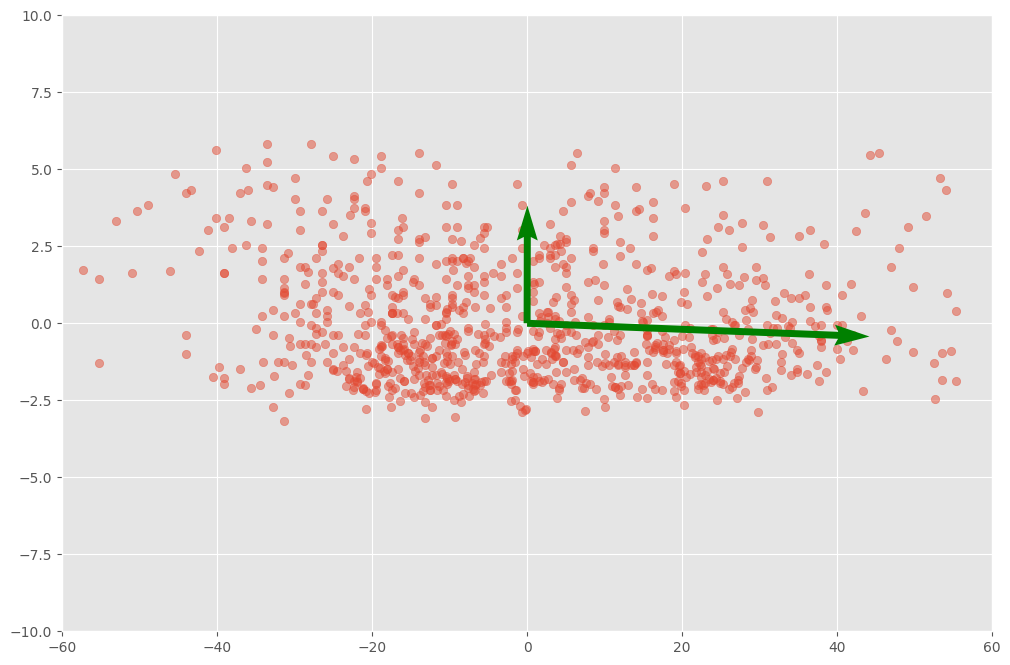

In [445]:
cov = np.array([[7,0],[0,1]])
Y = X.dot(cov)
eigenvalues, eigenvectors = np.linalg.eig(np.cov(Y[:, 0], Y[:, 1]))
origin = np.mean(Y, axis=0)  
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.5)
colors = ['g', 'g']
for color, (value, vector) in zip(colors, zip(eigenvalues, eigenvectors.T)):
    scaled_vector = vector * np.sqrt(value)  
    plt.quiver(*origin, *scaled_vector, color=color, scale=0.5, scale_units='xy', angles='xy', label=f'Eigenvector {color}')

plt.xlim([-60, 60])
plt.ylim([-10, 10])
plt.show()

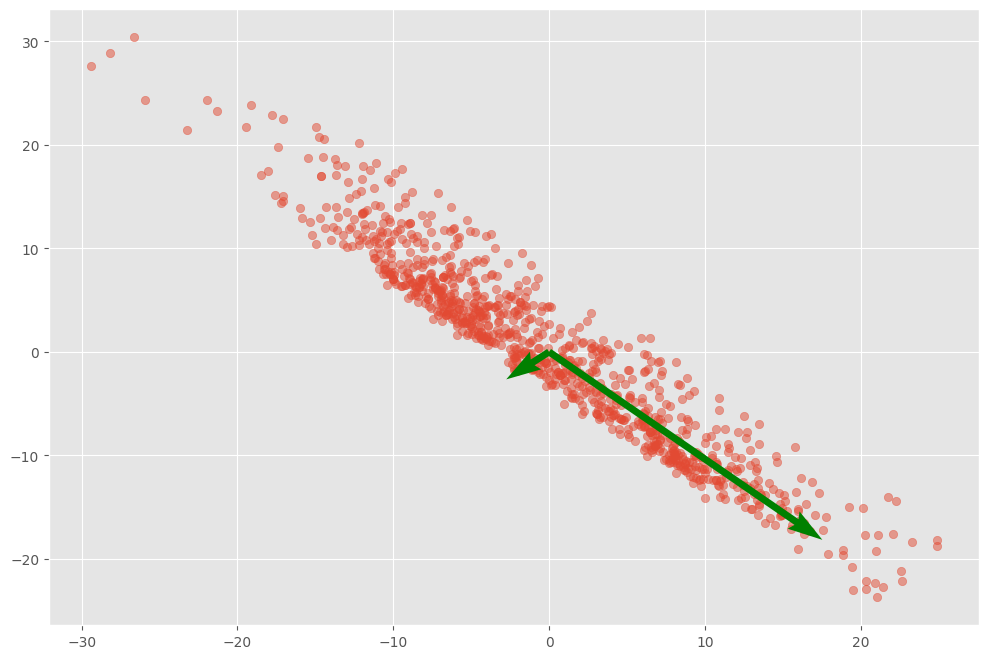

In [446]:
sigX, sigY = 4, 1
scale = np.array([[sigX, 0], [0, sigY]])
theta = np.pi / 4
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

T = scale.dot(Rot)
Y = X.dot(T)
cov = np.cov(Y[:, 0], Y[:, 1])
eigenvalues, eigenvectors = np.linalg.eig(cov)
origin = np.mean(Y, axis=0)
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.5)
colors = ['g', 'g']
for color, (value, vector) in zip(colors, zip(eigenvalues, eigenvectors.T)):
    scaled_vector = vector * np.sqrt(value)  
    plt.quiver(*origin, *scaled_vector, color=color, scale=0.5, scale_units='xy', angles='xy', label=f'Eigenvector {color}')

# plt.xlim([-60, 60])
plt.show()


[0.09970729 0.27591362] [[-0.99437917 -0.10587762]
 [ 0.10587762 -0.99437917]]


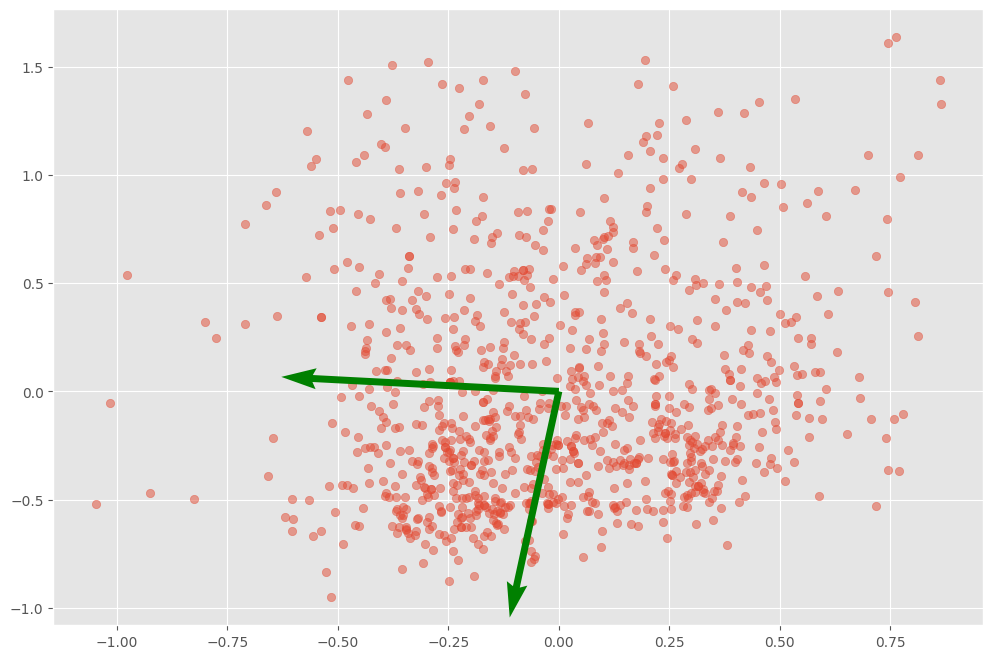

In [453]:
cov = np.cov(X[:, 0], X[:, 1])
matrix_inverse = np.linalg.inv(cov)

Y = X.dot(matrix_inverse)
eigenvalues, eigenvectors = np.linalg.eig(np.cov(Y[:, 0], Y[:, 1]))
print(eigenvalues, eigenvectors)
origin = np.mean(Y, axis=0)
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.5)
colors = ['g', 'g']
for color, (value, vector) in zip(colors, zip(eigenvalues, eigenvectors.T)):
    scaled_vector = vector * np.sqrt(value)  
    plt.quiver(*origin, *scaled_vector, color=color, scale=0.5, scale_units='xy', angles='xy', label=f'Eigenvector {color}')
plt.show()

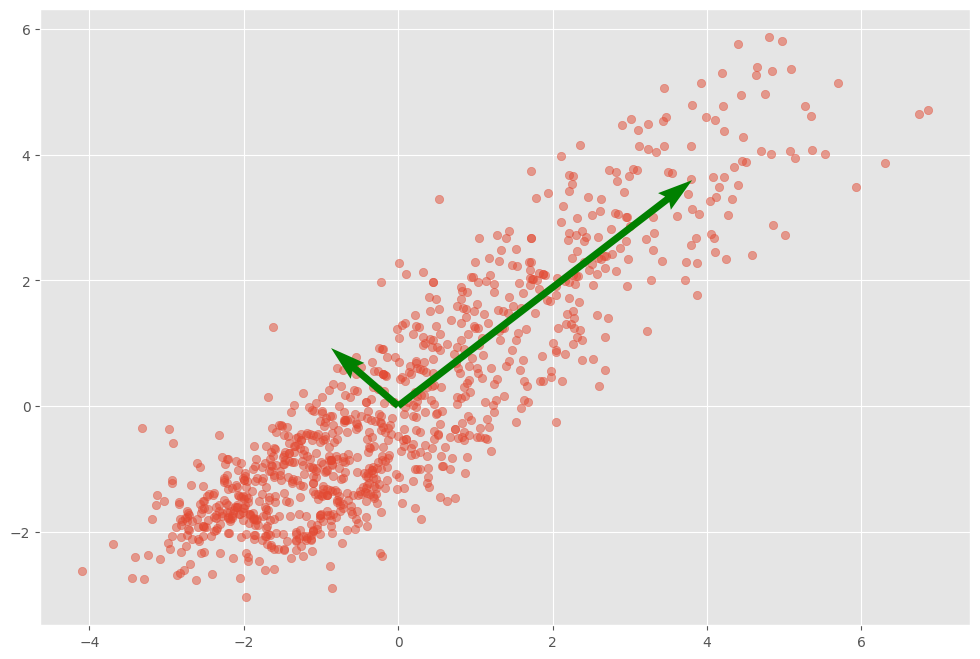

In [454]:
sigX, sigY = 2, 5
scale = np.array([[sigX, 0], [0, sigY]])
theta = np.pi / 4
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

T = scale.dot(Rot)
Z = Y.dot(T)
cov = np.cov(Z[:, 0], Z[:, 1])
eigenvalues, eigenvectors = np.linalg.eig(cov)
origin = np.mean(Z, axis=0)
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5)
colors = ['g', 'g']
for color, (value, vector) in zip(colors, zip(eigenvalues, eigenvectors.T)):
    scaled_vector = vector * np.sqrt(value)  
    plt.quiver(*origin, *scaled_vector, color=color, scale=0.5, scale_units='xy', angles='xy', label=f'Eigenvector {color}')
plt.show()


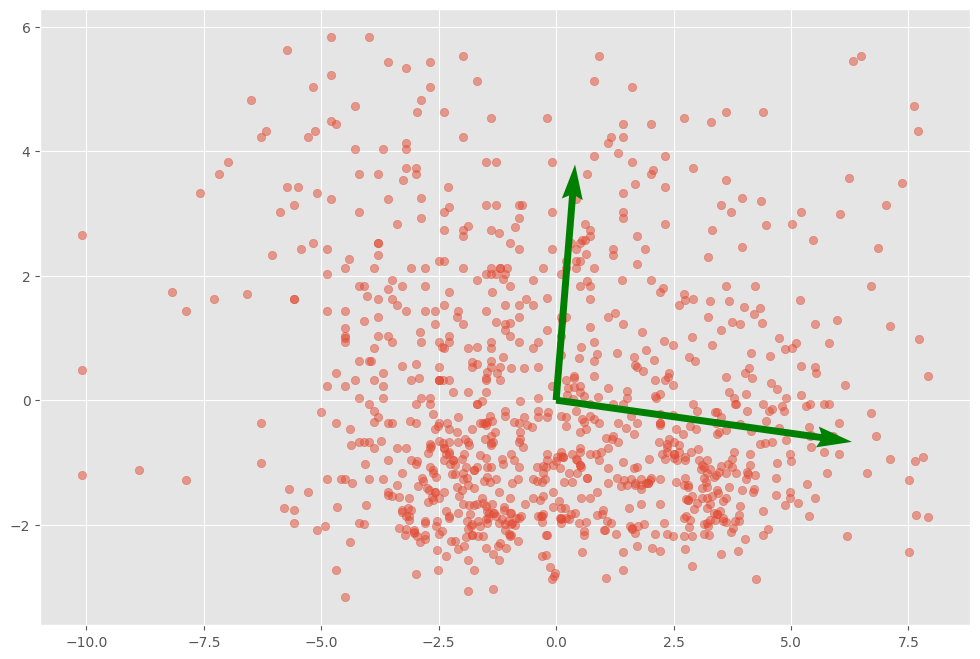

In [448]:
Z = Y.dot(cov)
eigenvalues, eigenvectors = np.linalg.eig(np.cov(Z[:, 0], Z[:, 1]))
origin = np.mean(Z, axis=0)
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5)
colors = ['g', 'g']
for color, (value, vector) in zip(colors, zip(eigenvalues, eigenvectors.T)):
    scaled_vector = vector * np.sqrt(value)  
    plt.quiver(*origin, *scaled_vector, color=color, scale=0.5, scale_units='xy', angles='xy', label=f'Eigenvector {color}')


plt.show()


In [449]:
print(eigenvalues, eigenvectors)

[10.02935645  3.62432272] [[ 0.99437917  0.10587762]
 [-0.10587762  0.99437917]]
